# Introduction to Sampling and Hypothesis Testing

## Sampling | Confidence intervals

In [1]:
# Select this cell and type Ctrl-Enter to execute the code below.

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Standard normal distribution

Consider a normal distribution with mean 0 and standard deviation 1:

$$Z \sim N(0,1)$$

$Z$ is known as the *standard normal distribution*.




In [2]:
Z = stats.norm(0,1)  # a standard normal distribution

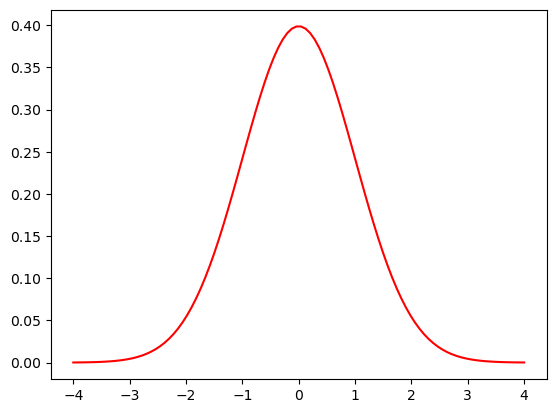

In [3]:
# plot the probability density function
x = np.linspace(-4,4,100)
plt.plot(x, Z.pdf(x), color='r')

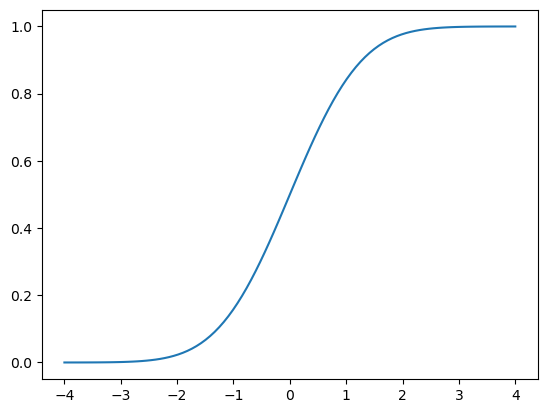

In [4]:
# plot the cumulative distribution function
plt.plot(x,Z.cdf(x))

How much of the probability mass lies within one, two, or three standard deviations of the mean? (Hint: use the cdf!)

In [5]:
# one sigma
Z.cdf(1) - Z.cdf(-1)

0.6826894921370859

In [6]:
# two sigma
Z.cdf(2) - Z.cdf(-2)

0.9544997361036416

In [8]:
# three sigma
Z.cdf(3) - Z.cdf(-3)

0.9973002039367398

We are often interested in the regions containing a certain percentage of the probability mass, for example, find $z_{90}$ such that

$$\mathbb{P}(-z_{90} < z < z_{90}) = 0.9$$

Python makes it easy for us to find these *critical values* of $z$, e.g.

In [9]:
region = Z.interval(0.9)
print(region)

(-1.6448536269514729, 1.6448536269514722)


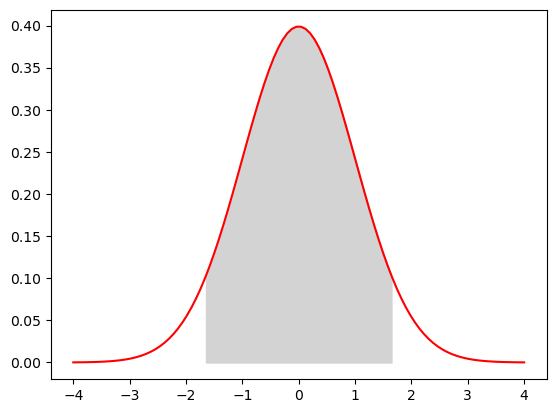

In [10]:
# plot the probability density function
plt.plot(x, Z.pdf(x), color='r')

# the shaded region contains 90% of the probability mass
x_region = np.linspace(region[0],region[1],100)
plt.fill_between(x_region,Z.pdf(x_region),color='lightgrey')

Find the corresponding regions for 95% and 99% of the probability mass.

In [11]:
#95%
Z.interval(.95)

(-1.959963984540054, 1.959963984540054)

In [12]:
#99%
Z.interval(.99)

(-2.5758293035489004, 2.5758293035489004)

### Z-score

Note that we can *standardise* any random variable by subtracting the mean and dividing by the standard deviation. When applied to a single observation, this is known as the *z-score*:

$$z =\frac{x-\mu}{\sigma}$$


### Confidence intervals

The best single estimate of the population mean $\mu$ based on a sample of data is simply the sample mean, $\bar{x}$.

However, it is often useful to describe the precision of our estimate by giving a *confidence interval* instead of a point estimate.

We say that the true mean lies within the interval with e.g. 90% confidence.

From the central limit theorem, $\bar{X} \sim N(\mu,\sigma^2/n)$

When $n$ is large (>30), we have $\sigma \approx s$, so $\bar{X} \sim N(\mu,s^2/n)$

Standardisation gives 
$$z = \frac{\bar{x}-\mu}{s/\sqrt{n}}$$

From the above critical value calculation, the 90\% confidence interval is where $-1.64 < z < 1.64$

Substituting for $z$, we have

$$\mathbb{P}\left(\bar{x}-1.64\frac{s}{\sqrt{n}} < \mu < \bar{x}+1.64\frac{s}{\sqrt{n}}\right) =  0.9$$



#### Example: speed of light

Below are the results of 64 measurements of the speed of light made by Simon Newcomb in 1882, in km/s.

In [13]:
data = np.array([265848, 256680, 248124, 310155, 265848, 201182, 232617,
       206770, 275694, 286297, 265848, 256680, 286297, 275694,
       338351, 323640, 372187, 297749, 297749, 206770, 323640,
       240120, 232617, 310155, 275694, 225568, 465233, 310155,
       256680, 206770, 354463, 265848, 286297, 275694, 275694,
       232617, 297749, 265848, 310155, 186093, 354463, 240120,
       232617, 265848, 286297, 248124, 275694, 286297, 310155,
       232617, 256680, 218933, 297749, 391775, 206770, 256680,
       248124, 338351, 265848, 225568, 190865, 297749, 465233,
       323640])

Based on these data, calculate a 95% confidence interval for the speed of light.

In [14]:
# first, calculate the sample mean and s.d.
xbar = np.mean(data)
print(xbar)

s = np.std(data,ddof=1)  ## use ddof=1 to use the unbiased estimator
print(s)

277866.671875
55638.32238894074


In [15]:
# now find the critical value
z95 = Z.interval(0.95)[1]
print(z95)

1.959963984540054


In [16]:
# finally calculate the 95% confidence interval for mu
ci = np.array([xbar - z95 * s / np.sqrt(64) , xbar + z95 * s / np.sqrt(64)])
print(ci)

[264235.53336968 291497.81038032]


### Confidence intervals for small $n$

The central limit theorem only applies when $n$ is large. For small samples ($n$<30), the normal distribution is not a good approximation to the sampling distribution of the mean, because our estimate of the population variance is likely to be poor.

However, for situations where the *population* is expected to be normally distributed, we can use **Student's t-distribution** to construct an appropriate confidence interval. This has a broader bell-curve, which reflects our lack of knowledge about the population variance.

The t-distribution takes an additional parameter, which is $\nu$, the number of degrees of freedom. We set this as $n-1$.

For high values of $\nu$, the t-distribution converges to the normal distribution.


In [ ]:
t = stats.t(df=1)
x = np.linspace(-4,4,100)
plt.plot(x, t.pdf(x), color='r')
plt.plot(x, Z.pdf(x), color='grey')

#### Example: counting beetles

You have been asked to measure the density of a particular species of beetle in a field.

The following are the observed numbers in 10 samples using a 1 m<sup>2</sup> [quadrat](https://en.wikipedia.org/wiki/Quadrat).

In [ ]:
data = np.array([5, 1, 6, 3, 2, 4, 2, 7, 1, 0])

Calculate a 95% confidence interval for the beetle density.

In [ ]:
# first, calculate the sample mean and s.d.
xbar = np.mean(data)
print(xbar)

s = np.std(data,ddof=1)  ## use ddof=1 to use the unbiased estimator
print(s)

In [ ]:
# construct the appropriate t-distribution
T9 = stats.t(df=9)

In [ ]:
# now find the critical value
t95 = T9.interval(0.95)[1]
print(t95)

In [ ]:
# finally calculate the 95% confidence interval for mu
ci = np.array([xbar - t95 * s / np.sqrt(10) , xbar + t95 * s / np.sqrt(10)])
print(ci)